In [1]:
%autosave 0

Autosave disabled




# Numerical arrays and vectorized computation
# Lab 1: Unassessed
This lab does not count towards your final mark.

<font color="red"> You will need to read the sections of the Week 1's lecture notes on aggregate and ordering operations before doing this lab </font>


### Jupyter
If you have not used Jupyter before, you may wish to look at the ["Intro to Jupyter" guide ](JupyterBasics.ipynb). However, most things are straightforward. Press SHIFT-ENTER to run a code cell (click on it first to select it; you'll see a highlight on the left hand margin appear). Try it below.



In [ ]:
print("Run me!")

Note that you can use TAB to autocomplete, and SHIFT-TAB to bring up the documentation for any command (even if it is a bit terse). Press ESC then H for a full list of keyboard shortcuts.

**Save frequently**

----

### Notes
It is recommended to keep the lecture notes open while doing this lab exercise.

This exercise is *not* assessed, but you are asked to upload your solution to Moodle; you will receive autograded feedback on your work, but the marks will not count towards your final DF(H) grade.


### References
If you are stuck, the following resources are very helpful:

* [NumPy cheatsheet](https://github.com/juliangaal/python-cheat-sheet/blob/master/NumPy/NumPy.md)
* [NumPy API reference](https://docs.scipy.org/doc/numpy-1.13.0/reference/)
* [NumPy user guide](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.html)


* [Python for Data Science cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PythonForDataScience.pdf)
* [Another NumPy Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)

### Tutorials
You don't need to read these, but if you get stuck or want to go further in depth, the following online resources are helpful for getting familiar with scientific processing in Python:
* JR Johansson's scientific python notes: [JRJohansson](https://github.com/jrjohansson/scientific-python-lectures)
* Scientific packages are well covered in this article: [SciPy lectures](https://scipy-lectures.github.io/)
* A useful [Stanford course](http://web.stanford.edu/~arbenson/cme193.html) on scientific python

## Purpose of this lab
This lab should help you:
* create simple arrays
* index and slice arrays
* stack arrays together
* compute simple statistics of arrays
* understand array arithmetic and broadcasting rules
* apply conditions to arrays and use boolean indexing

In [1]:
# Make sure you run this cell!
import numpy as np  # NumPy

# Set up Matplotlib
import matplotlib as mpl   
import matplotlib.pyplot as plt
%matplotlib inline

import image_audio as ia
from checkarr import array_hash, check_hash
print("Everything imported OK")

Everything imported OK


-----
# Numpy

The foundation package for numerical operations is **numpy** which provides an array type and accelerated operations on it. 

A very important part of using numerical libraries like numpy is **vectorising operations**: avoiding explicit loops over values in the arrays and instead using library functions to do manipulations. It is *massively* faster to have numpy add to arrays together than to iterate over the elements adding them together in Python.

        # YES: do things like this
        # a and b are NumPy arrays
        x = a + b

        # NO: don't do this
        # this is very inefficient
        for i in range(a.shape[0]):
            for j in range(a.shape[1]):
                y[i,j] = a[i,j] + b[i,j]

## No for loops (unless specified)
In this lab **do not** use explicit loops, like `while` or `for`, unless the question explicitly asks you to. 

Numpy provides the **np.array** class which is a n-dimensional array of numbers **of the same type**. Arrays can be created in several ways: from a Python list (and nD arrays from nested lists), as a "blank" matrix of zeros or ones or random data, by copying existing arrays, loaded from disk or from certain special functions.

**You can always make a copy of an array using np.array() on an existing array** (e.g. `x = np.array(y)` makes a new **copy** of y). `np.array()` will also convert any iterable object (lists, tuples) into an array if it can. Note that a few operations will *change arrays in place*, and most will *return new copies*.

In [9]:
x = np.array([1.0,2.0,3.0,4.0]) # create an array from a list
print(x) # print the array
print(x.dtype)  # datatype
print(x.shape)  # shape of array

[ 1.  2.  3.  4.]
float64
(4,)


# 1: Create some arrays
Create the following arrays, with the following specifications:
(**don't** use `np.array` to do this -- look at the lecture notes!)

* `x`: a 3 x 3 matrix of all zeros
* `y`: a 13 element 1D vector of all ones
* `z`: a 2 x 3 x 4 tensor, with all elements equal to 9.1
* `q`: an array with 10 elements, from 0-9.
* `r`: an 8 column, 4 row array, numbers randomly distributed in the range [-1,1)

Print out your arrays to see if they look right.

Check that the tests pass. 

In [10]:
## BEGIN SOLUTION
x = np.zeros((3,3))
print("x\n", x)
y = np.ones(13)
print("y\n", y)
z = np.full((2,3,4), 9.1)
print("z\n", z)
q = np.arange(10)
print("q\n", q)
r = np.random.uniform(-1,1, (4,8))
print("r\n", r)
## END SOLUTION

x
 [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
y
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
z
 [[[ 9.1  9.1  9.1  9.1]
  [ 9.1  9.1  9.1  9.1]
  [ 9.1  9.1  9.1  9.1]]

 [[ 9.1  9.1  9.1  9.1]
  [ 9.1  9.1  9.1  9.1]
  [ 9.1  9.1  9.1  9.1]]]
q
 [0 1 2 3 4 5 6 7 8 9]
r
 [[  6.65554825e-01  -8.08349508e-01   2.58588956e-02   2.46230816e-01
    8.08633232e-01  -9.58647632e-01  -8.92843507e-01   6.25133768e-01]
 [  5.50407286e-01   1.94812033e-02  -6.77268847e-01   9.96325083e-03
   -3.47437928e-01  -9.18666912e-01   8.28919952e-01  -8.04030612e-04]
 [ -1.48416430e-01  -7.85720853e-01  -5.83858328e-01   8.97976449e-01
   -4.09098748e-01  -5.61811365e-01  -2.59956138e-01  -1.74022730e-01]
 [  7.50792995e-01   5.98549186e-01  -5.01879799e-01  -8.53028788e-01
    6.98318555e-01  -1.35531459e-01   9.12770193e-01  -3.09979285e-01]]


In [11]:
assert(check_hash(x,((3, 3), 0.0)))

In [12]:
assert(check_hash(y, ((13,), 95.0)))

In [13]:
assert(check_hash(z, ((2, 3, 4), 2766.4000000000001)))

In [14]:
assert(check_hash(q,((10,), 350.87228132326902)))

In [15]:
assert(r.shape==(4,8)  and np.max(r)<1.0 and np.min(r)>=-1.0 and np.all(np.diff(r.ravel())!=0.0))

## 2: How to keep snails alive

<img src="imgs/snails.jpg">*[[Image](https://flickr.com/photos/chodhound/6083328289 "Snail") by [ChodHound](https://flickr.com/people/chodhound) license [CC BY-SA](https://creativecommons.org/licenses/by-sa/2.0/)]*

Scientists at the Zoology Department, The University of Adelaide have studied the best conditions to keep snails alive. They have recorded a dataset of observations of snail mortality under controlled conditions. This data set is in the file `data/snails.txt`.

#### An excerpt from the data set description
>Groups of 20 snails were held for periods of 1, 2, 3 or 4 weeks in carefully
controlled conditions of temperature and relative humidity. There were two
species of snail, 0 and 1. At the end of the exposure time the snails
were tested to see if they had survived. 

>The data are unusual in that in most cases fatalities during the experiment
were fairly small. [lucky snails!]

### The task
The data is a 2D array, and has six columns, with these definitions:

    species(binary) exposure(weeks) humidity(%) temperature(deg. C) n_deaths n_snails
    
Each row represents one set of observations (i.e. one group of snails). You are to compute some basic properties of this data. Use NumPy operations to do the computations.

A. **Loading arrays** 
* Load this data as a NumPy array called `snails`. Note: use NumPy functions to do this!
* Print it out. Use this format to print out the results:
    
      print("snails\n", snails)

In [16]:
### BEGIN SOLUTION
snails = np.loadtxt("data/snails.txt")
print("snails\n", snails)
### END SOLUTION

snails
 [[  0.    1.   60.   10.    0.   20. ]
 [  0.    1.   60.   15.    0.   20. ]
 [  0.    1.   60.   20.    0.   20. ]
 [  0.    1.   65.8  10.    0.   20. ]
 [  0.    1.   65.8  15.    0.   20. ]
 [  0.    1.   65.8  20.    0.   20. ]
 [  0.    1.   70.5  10.    0.   20. ]
 [  0.    1.   70.5  15.    0.   20. ]
 [  0.    1.   70.5  20.    0.   20. ]
 [  0.    1.   75.8  10.    0.   20. ]
 [  0.    1.   75.8  15.    0.   20. ]
 [  0.    1.   75.8  20.    0.   20. ]
 [  0.    2.   60.   10.    0.   20. ]
 [  0.    2.   60.   15.    1.   20. ]
 [  0.    2.   60.   20.    1.   20. ]
 [  0.    2.   65.8  10.    0.   20. ]
 [  0.    2.   65.8  15.    1.   20. ]
 [  0.    2.   65.8  20.    0.   20. ]
 [  0.    2.   70.5  10.    0.   20. ]
 [  0.    2.   70.5  15.    0.   20. ]
 [  0.    2.   70.5  20.    0.   20. ]
 [  0.    2.   75.8  10.    0.   20. ]
 [  0.    2.   75.8  15.    0.   20. ]
 [  0.    2.   75.8  20.    0.   20. ]
 [  0.    3.   60.   10.    1.   20. ]
 [  0.    3.   60

In [17]:
assert(check_hash(snails, ((96, 6), 3082003.4024073719)))

B. **Basic indexing** 
Compute the following results, storing the results in the variable specified and printing them out. Use the same printing format as A.

* `hum_first` the humidity in the first entry in the table.
* `temp_last` the temperature in the last entry in the table. 
* `weeks` the whole column of "weeks exposure".
* `row_8` the 8th row of observations.


In [18]:
## BEGIN SOLUTION
hum_first = snails[0, 2]
temp_last = snails[-1, 3]
weeks = snails[:,1]
row_8 = snails[8,:]
print("hum_first\n", hum_first)
print("temp_last\n", temp_last)
print("weeks\n", weeks)
print("row_8\n", row_8)
## END SOLUTION

hum_first
 60.0
temp_last
 20.0
weeks
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.]
row_8
 [  0.    1.   70.5  20.    0.   20. ]


In [19]:
assert(check_hash(hum_first, ((), 300.0)))
assert(check_hash(temp_last, ((), 100.0)))

In [20]:
assert(check_hash(weeks, ((96,), 13091.118033988751)))
assert(check_hash(row_8, ((6,), 537.9134505747445)))

C. **Aggregate functions** 
Compute the following results, storing the results in the variable specified and printing them out:

* `total_deaths` total number of snails that died
* `total_still_alive` total number of snails that survived the whole study
* `mean_temp` mean temperature in the whole study
* `max_humidity` highest humidity in the study
* `average_death_rate` mean of the ratio of snail deaths to snails in the study
* `snail_weeks` the total amount of snail effort that went into this study (number of snails times number of weeks)

Each computation should be a single line of code

In [21]:
### BEGIN SOLUTION
total_deaths = np.sum(snails[:,4])
total_still_alive = np.sum(snails[:,5]) - total_deaths
mean_temp = np.mean(snails[:,3])
max_humidity = np.max(snails[:,2])
average_death_rate = np.mean(snails[:,4]/ snails[:,5])
snail_weeks = np.sum(snails[:,5]*snails[:,1])

print("total_deaths", total_deaths)
print("total_still_alive", total_still_alive)
print("mean_temp", mean_temp)
print("max_humidity", max_humidity)
print("average_death_rate", average_death_rate)
print("snail_weeks", snail_weeks)
### END SOLUTION

total_deaths 275.0
total_still_alive 1645.0
mean_temp 15.0
max_humidity 75.8
average_death_rate 0.143229166667
snail_weeks 4800.0


In [23]:
assert(check_hash(total_deaths, ((), 1375.0)))
assert(check_hash(total_still_alive, ((), 8225.0)))

In [24]:
assert(check_hash(mean_temp, ((), 75.0)))
assert(check_hash(max_humidity, ((), 379.0)))

In [25]:
assert(check_hash(average_death_rate, ((), 0.71614583333333326)))

In [26]:
assert(check_hash(snail_weeks, ((), 24000.0)))

D. **Boolean indexing**
Compute the following results, storing the results in the variable specified and printing them out:

* `species_0` and `species_1`: split the dataset into two arrays, one with the entries for species 0 and one with the entries for species 1.

* `hardiest_snail` the snail species (0 or 1) that had the lowest average death rate

In [28]:
### BEGIN SOLUTION
# split into two parts, based on species column
species_0 = snails[snails[:,0]==0]
species_1 = snails[snails[:,0]==1]
print("species0\n",species_0)
print("species1\n",species_1)

# compute mean for each subdivision of the data
average_death_rate_0 = np.mean(species_0[:,4]/ species_0[:,5])
average_death_rate_1 = np.mean(species_1[:,4]/ species_1[:,5])

# which is bigger?
hardiest_snail = 1 if average_death_rate_0>average_death_rate_1 else 0
print("hardiest_snail\n",hardiest_snail)
### END SOLUTION    

species0
 [[  0.    1.   60.   10.    0.   20. ]
 [  0.    1.   60.   15.    0.   20. ]
 [  0.    1.   60.   20.    0.   20. ]
 [  0.    1.   65.8  10.    0.   20. ]
 [  0.    1.   65.8  15.    0.   20. ]
 [  0.    1.   65.8  20.    0.   20. ]
 [  0.    1.   70.5  10.    0.   20. ]
 [  0.    1.   70.5  15.    0.   20. ]
 [  0.    1.   70.5  20.    0.   20. ]
 [  0.    1.   75.8  10.    0.   20. ]
 [  0.    1.   75.8  15.    0.   20. ]
 [  0.    1.   75.8  20.    0.   20. ]
 [  0.    2.   60.   10.    0.   20. ]
 [  0.    2.   60.   15.    1.   20. ]
 [  0.    2.   60.   20.    1.   20. ]
 [  0.    2.   65.8  10.    0.   20. ]
 [  0.    2.   65.8  15.    1.   20. ]
 [  0.    2.   65.8  20.    0.   20. ]
 [  0.    2.   70.5  10.    0.   20. ]
 [  0.    2.   70.5  15.    0.   20. ]
 [  0.    2.   70.5  20.    0.   20. ]
 [  0.    2.   75.8  10.    0.   20. ]
 [  0.    2.   75.8  15.    0.   20. ]
 [  0.    2.   75.8  20.    0.   20. ]
 [  0.    3.   60.   10.    1.   20. ]
 [  0.    3.   

In [29]:
assert(check_hash(species_0, ((48, 6), 762041.58357993606)))
assert(check_hash(species_1, ((48, 6), 791902.31693958596)))  

In [30]:
assert(check_hash(hardiest_snail, ((), 0.0)))

E. **Arithmetic and ordering**
Compute the following results, storing the results in the variable specified and printing them out:

* `deg_f` each temperature in the study, but in degrees Fahrenheit. Use the knowledge that `0C = 32F, 100C = 212F`
* `mean_cols` the mean of all the columns, as a 1D vector
* `death_rate` the death rates, in sorted order, smallest first
* `exposure_death_order` the exposure durations (in weeks), but in sorted in the order of death rates, smallest death rate first.

* `best_temp`, `best_hum` the best temperature and humidity to keep a snail for one week. *Look only at the 1 week exposures.* 

In [33]:
### BEGIN SOLUTION
# simple arithmetic on the temperature column
deg_f = snails[:,3] * (212-32)/100.0 + 32
print(deg_f)

mean_cols = np.mean(snails, axis=0)
print(mean_cols)


# compute death rate, then sort it
deaths = snails[:,4]/ snails[:,5]
death_rate = np.sort(deaths)
print(death_rate)

# compute the *ordering* that would sort the death rates
# and apply it to index the array of exposures
death_rate_order = np.argsort(deaths)
exposure_death_order = snails[:,1][death_rate_order]
print(exposure_death_order) # the leading killer of snails is old age

# select only the snails that were kept for one week
# select the death rate for those snails
week_1 = snails[snails[:,1]==1]
week_1_deaths = week_1[:,4]/ week_1[:,5]
best_conditions = np.argmin(week_1_deaths) # smallest death rate *index*

# now index the temp and humidity using that index
# note: this will only work indexing week_1
best_temp, best_hum = week_1[best_conditions,3], week_1[best_conditions,2]
print(best_temp, best_hum)
### END SOLUTION

[ 50.  59.  68.  50.  59.  68.  50.  59.  68.  50.  59.  68.  50.  59.  68.
  50.  59.  68.  50.  59.  68.  50.  59.  68.  50.  59.  68.  50.  59.  68.
  50.  59.  68.  50.  59.  68.  50.  59.  68.  50.  59.  68.  50.  59.  68.
  50.  59.  68.  50.  59.  68.  50.  59.  68.  50.  59.  68.  50.  59.  68.
  50.  59.  68.  50.  59.  68.  50.  59.  68.  50.  59.  68.  50.  59.  68.
  50.  59.  68.  50.  59.  68.  50.  59.  68.  50.  59.  68.  50.  59.  68.
  50.  59.  68.  50.  59.  68.]
[  0.5          2.5         68.025       15.           2.86458333  20.        ]
[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.1
  0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.15  0.15  0.15  0.15  0.15
  0.15  0.15  0.2   0.2   0.2   0.2   0.2   0.2   0.2   

In [ ]:
assert(check_hash(deg_f, ((96,), 275523.34846922837)))

In [35]:
assert(check_hash(mean_cols, ((6,), 522.92336963727359)))

((6,), 522.92336963727359)


In [39]:

assert(check_hash(death_rate, ((96,), 1100.9803982902313)))

((96,), 1100.9803982902313)


In [42]:
assert(check_hash(exposure_death_order, ((96,), 13983.118033988751)))

((96,), 13983.118033988751)


In [45]:
assert(check_hash(best_temp, ((), 50.0)))
assert(check_hash(best_hum, ((), 300.0)))      

## 3: Image operations
Images can be represented as numerical arrays. We will use images as an example to explore NumPy functionality.

* `img = ia.load_image_colour('filename.png')` will load an image as an array.
* `ia.show_image(img)` will show it in the notebook.
    

A)
* Load `data/parrots.png` as `img_array`
* Print out its shape and dtype
* Show the image.

(512, 768, 3) float64


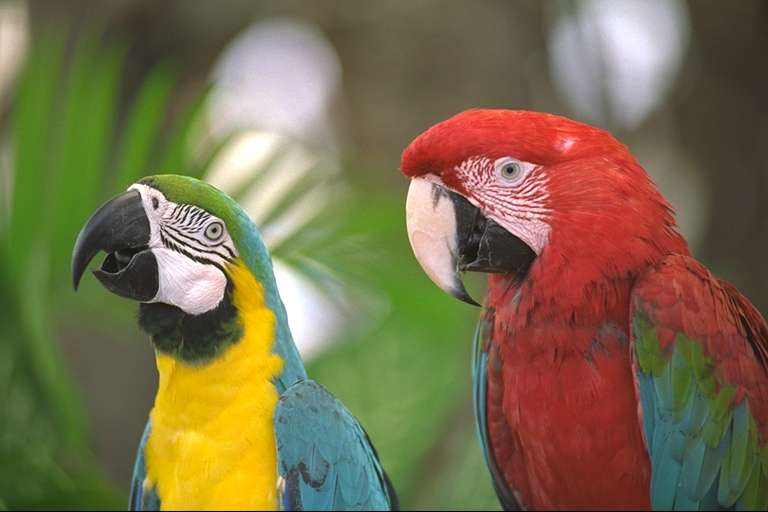

In [26]:
## BEGIN SOLUTION
img_array = ia.load_image_colour("data/parrots.png")
print(img_array.shape, img_array.dtype)
ia.show_image(img_array)
## END SOLUTION

In [ ]:

assert(check_hash(img_array, ((512, 768, 3), 269458072078.68924)))


B) **Slicing arrays**
* Create an array `cropped` which has the pixels from [150,100] to [350,300]. Note that these positions are in [row, col] format.
* Display the cropped array using `show_image()`. 
* Remember: the image is `WxHx3`. Think about how to slice the last dimension.
* Show the cropped image so you can see it.

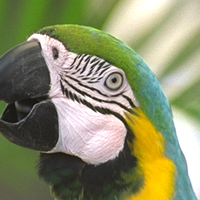

60684.6470588 (200, 200, 3)


In [27]:

## BEGIN SOLUTION
cropped = img_array[150:350, 100:300, :] # note: the last colon can actually be omitted
ia.show_image(cropped)
print(np.sum(cropped), cropped.shape)
## END SOLUTION

In [28]:
assert(check_hash(cropped, ((200, 200, 3), 3409234926.1084023)))

C)  **Modifying arrays**

Create an array "censored" which is the same as `img_array`, but has a black bar across the following regions:
    * [200,100] -> [260, 310]
    * [140, 400]-> [200, 650]

Setting array elements to zero will make them black.

**Do not modify the original `img_array`**

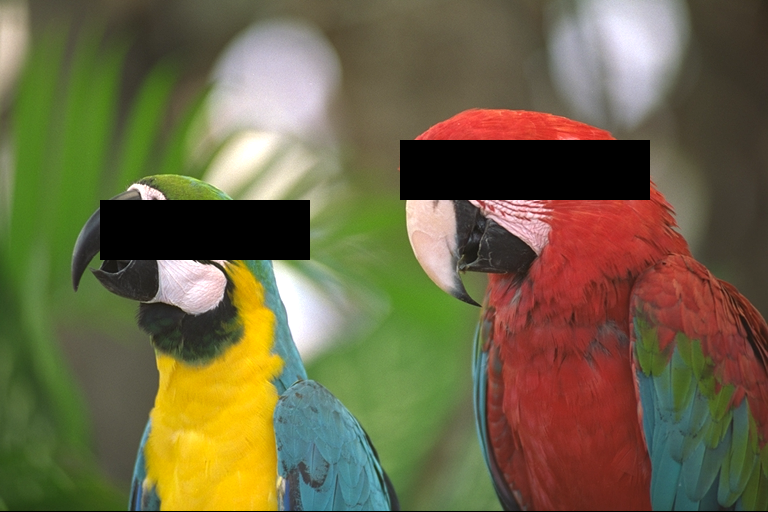

In [30]:
## BEGIN SOLUTION
censored = np.array(img_array)
# just use slicing to set all of the values to zero
censored[200:260,100:310, :] = 0
censored[140:200,400:650, :] = 0
ia.show_image(censored)
## END SOLUTION

In [31]:
assert(check_hash(censored, ((512, 768, 3), 250654064351.74332)))
assert(check_hash(img_array, ((512, 768, 3), 269458072078.68924)))

D) **Elementwise arithmetic** The image is stored as three colour planes, R,G,B. This is the `3` in the last position of the shape of the image. The planes are often referred to as "channels". 

* Create an array `channel_diff`, which will be the difference of the red channel of `img_array` (channel 0) from the green channel (channel 1), scaled by a factor of **eight**.

* Show this image.


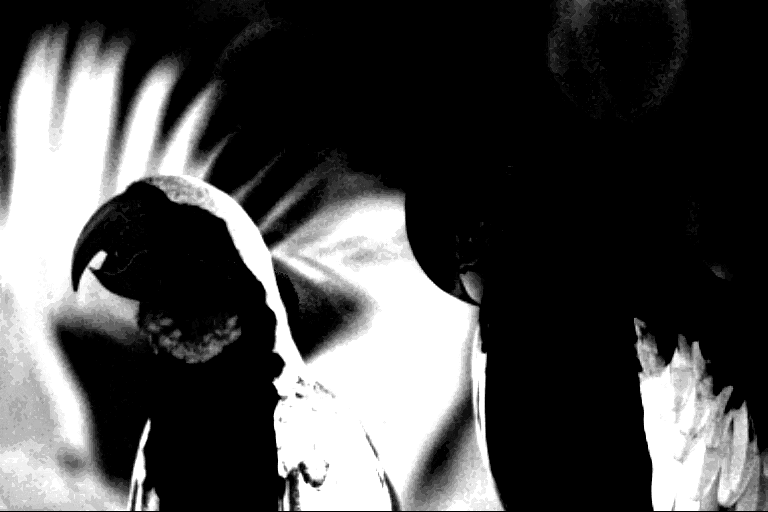

In [32]:
## BEGIN SOLUTION
channel_diff = 8*(img_array[:,:,1] - img_array[:,:,0])
ia.show_image(channel_diff)
## END SOLUTION

In [34]:
assert(check_hash(channel_diff, ((512, 768), -27985653456.915482)))

E) **Stacking arrays**

Using *one* `for` loop, create a *list* of arrays which represent a panning animation which is a sequence of cropped versions of `img_array`. 

* The crops should start at [80,380] and be 250 pixels wide and high, and move 12 pixels left and 2 pixels down in each frame (that means the column index decreases by 12, and the row index increases by 2). 
* Create 30 frames. All of them will be the same size.
* Stack the array into a single `[30, 250, 250, 3]` shape array called `panning_array`.
* Show the resulting animation using `ia.show_gif(panning_array)`

Your code should be less than 10 lines (excluding any comments)!

(30, 250, 250, 3)


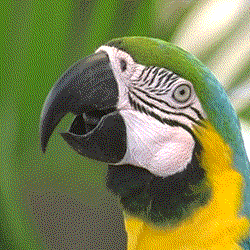

In [35]:
## BEGIN SOLUTION
# starting position
row, col = 80, 380
panning = []

# loop over frames
for i in range(30):
    # append the cropped array
    panning.append(img_array[row:row+250, col:col+250, :])
    # pan
    col -= 12
    row += 2

# concatenate the array
panning_array = np.stack(panning)
# will be [30,250,250,3]
print(panning_array.shape)

ia.show_gif(panning_array)
## END SOLUTION

In [ ]:
assert(check_hash(panning_array,((30, 250, 250, 3), 7970381992852.1006)))